In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\amans\\Music\\Machine Learning Udemy\\UNZIP_FOR_NOTEBOOKS_FINAL\\DATA\\rock_density_xray.csv")

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [4]:
df.columns = ['Signal','Density']

In [5]:
df.head()

,Signal,Density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


<Axes: xlabel='Signal', ylabel='Density'>

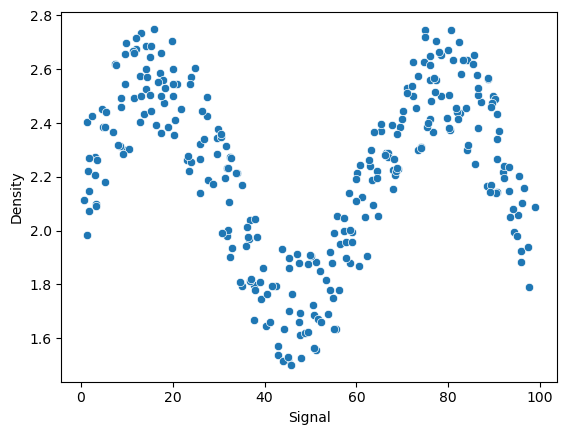

In [6]:
sns.scatterplot(x = df['Signal'],y= df['Density'])

In [7]:
X = df['Signal'].values.reshape(-1,1)

In [8]:
y= df['Density']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr_model = LinearRegression()

In [13]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [14]:
lr_preds = lr_model.predict(X_test)
lr_preds

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [15]:
from sklearn.metrics import  mean_absolute_error,mean_squared_error

In [16]:
lr_mae = mean_absolute_error(y_test,lr_preds)
lr_mae

0.211198973318633

In [17]:
np.sqrt(mean_squared_error(y_test,lr_preds))

0.2570051996584629

In [18]:
signal_range= np.arange(0,100)

In [19]:
signal_preds = lr_model.predict(signal_range.reshape(-1,1))

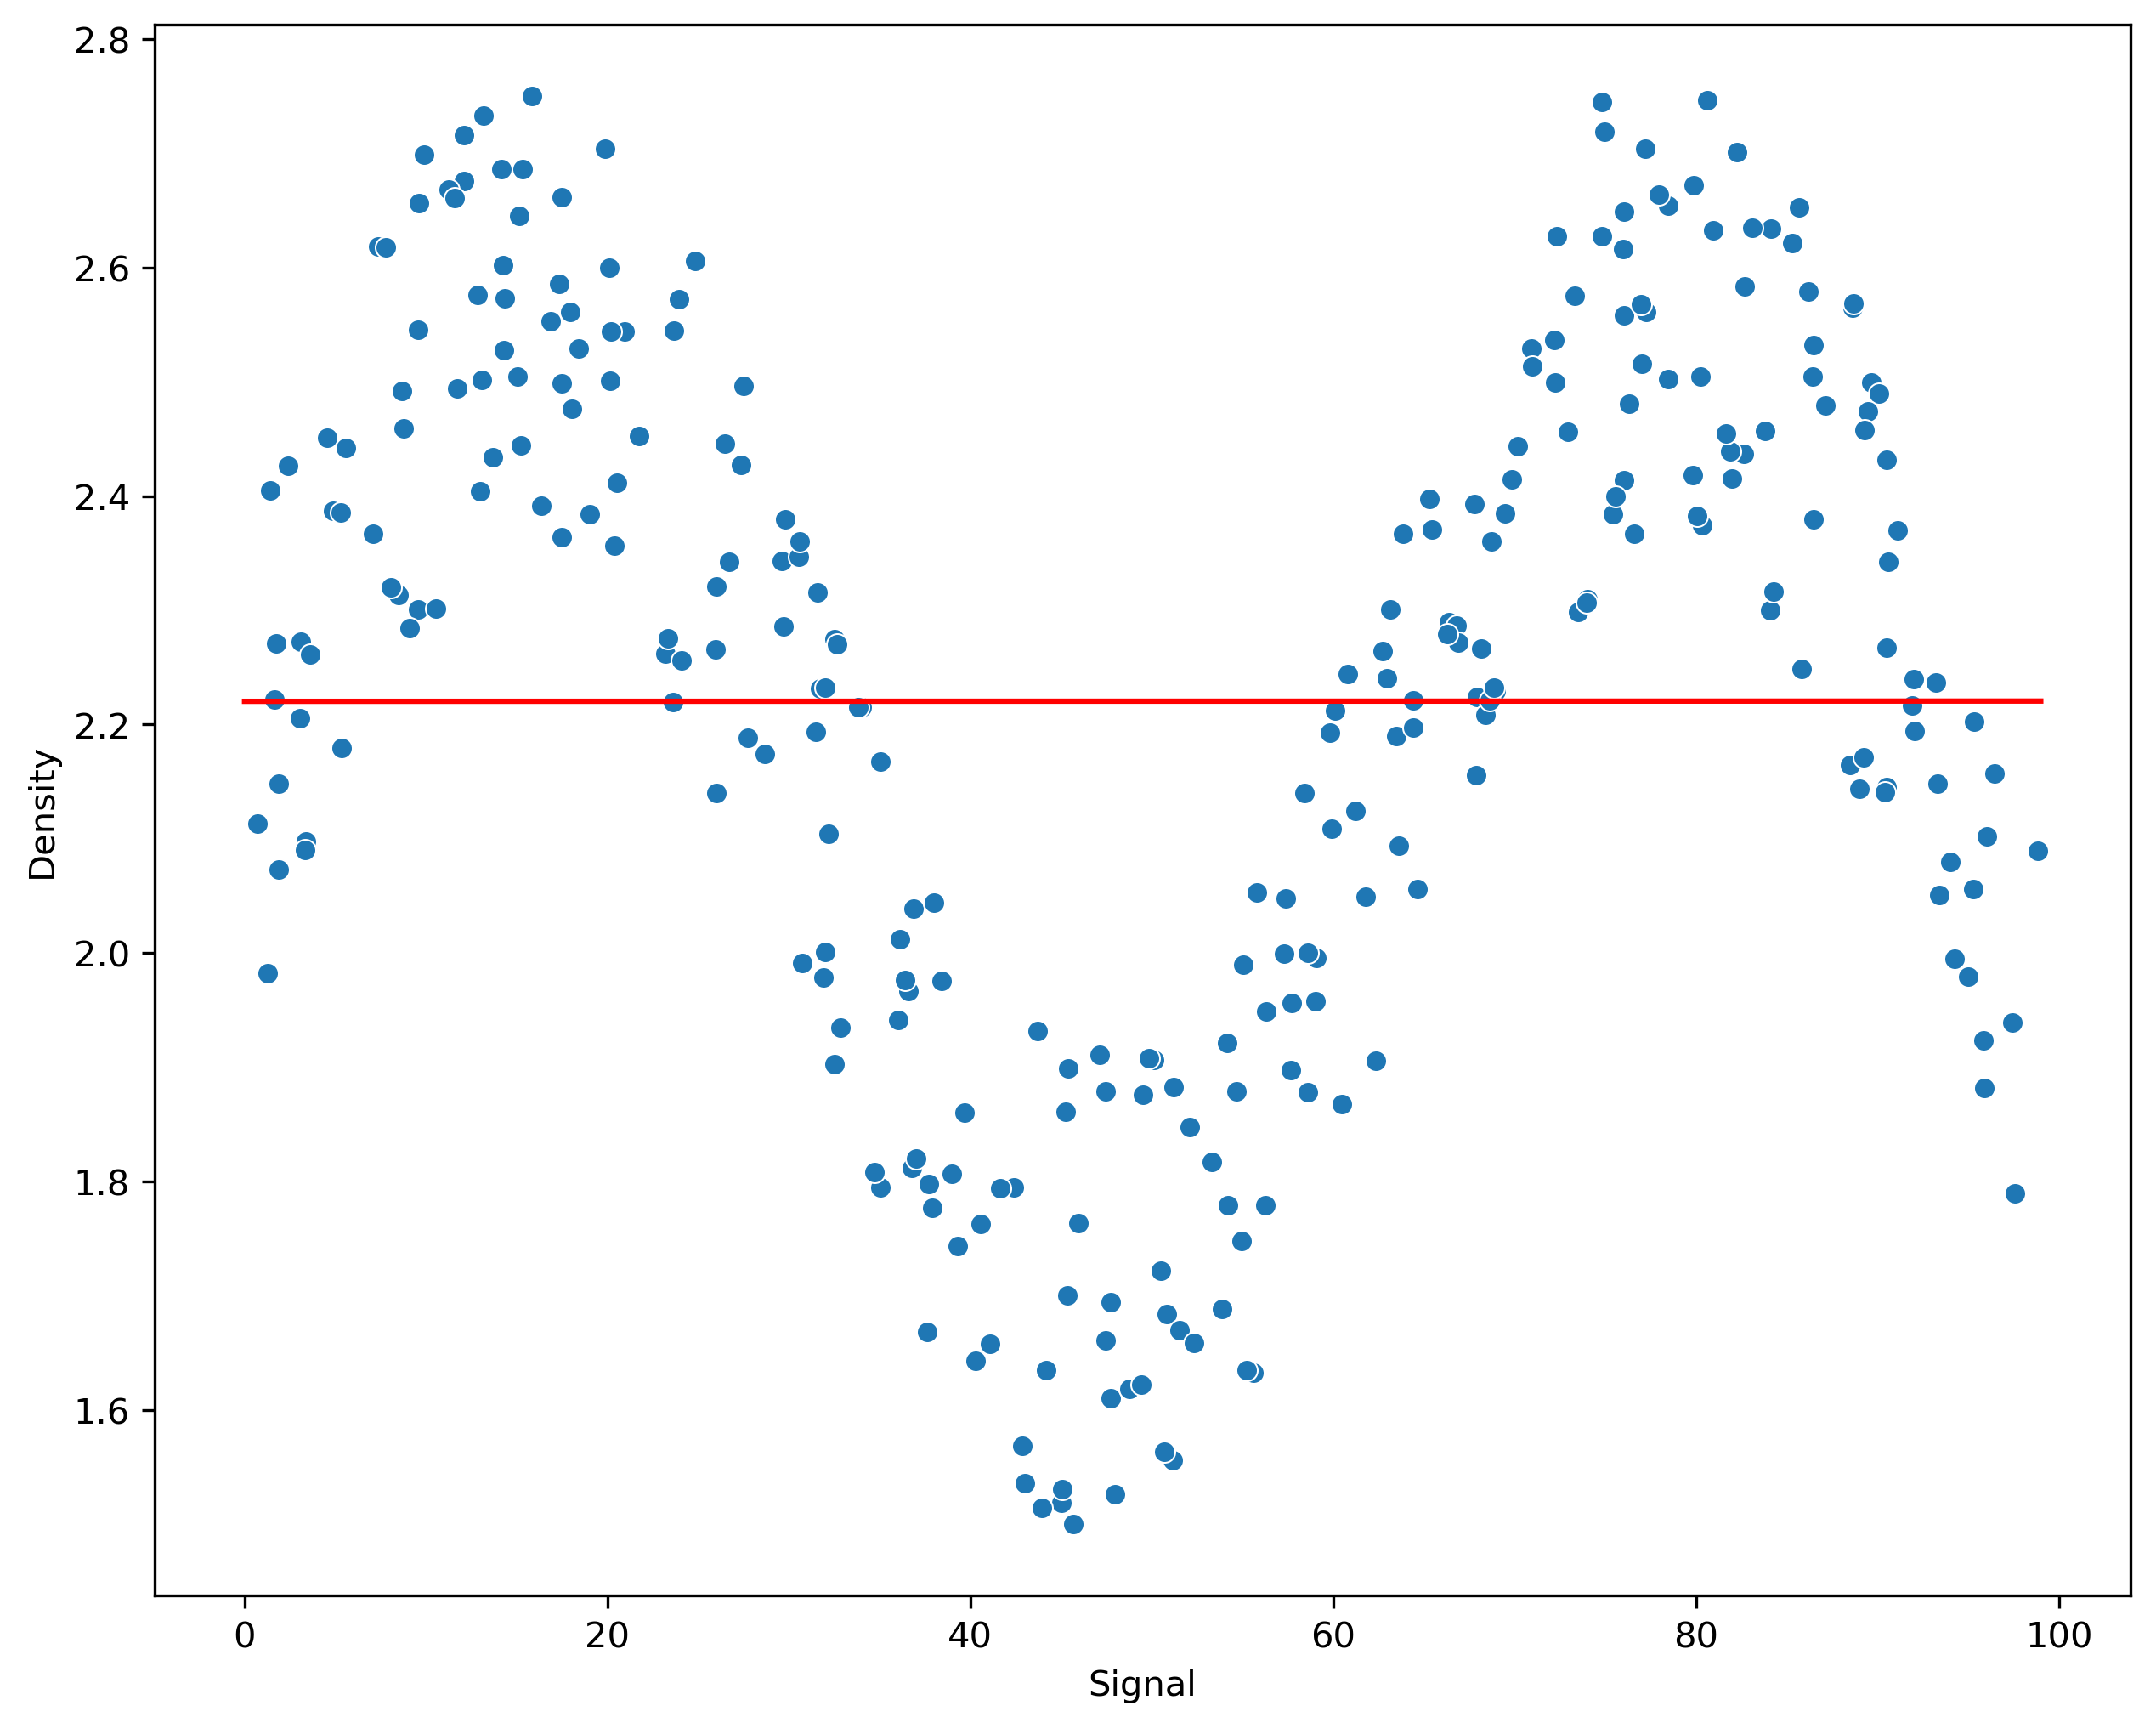

In [20]:

plt.figure(figsize=(10,8),dpi=300)
sns.scatterplot(x = df['Signal'],y= df['Density'])
plt.plot(signal_range,signal_preds,'r');

Polynomial Regression :

In [21]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    #Fit model training
    model.fit(X_train,y_train)
    
    #Get Error Metrices
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    mae = mean_absolute_error(y_test,preds)
    
    print(f'MAE : {mae} ')
    print(f'RMSE: {rmse}')
    
    #plot result model signal range
    
    
    signal_range = np.arange(0,100)
    signal_preds = model.predict(signal_range.reshape(-1,1))
    plt.figure(figsize=(10,8),dpi=300)
    sns.scatterplot(x = df['Signal'],y= df['Density'])
    plt.plot(signal_range,signal_preds,'r');                      
                        

In [22]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures





pipe = make_pipeline(PolynomialFeatures(degree= 6), LinearRegression())




MAE : 0.11969197005620795 
RMSE: 0.13807557849778548


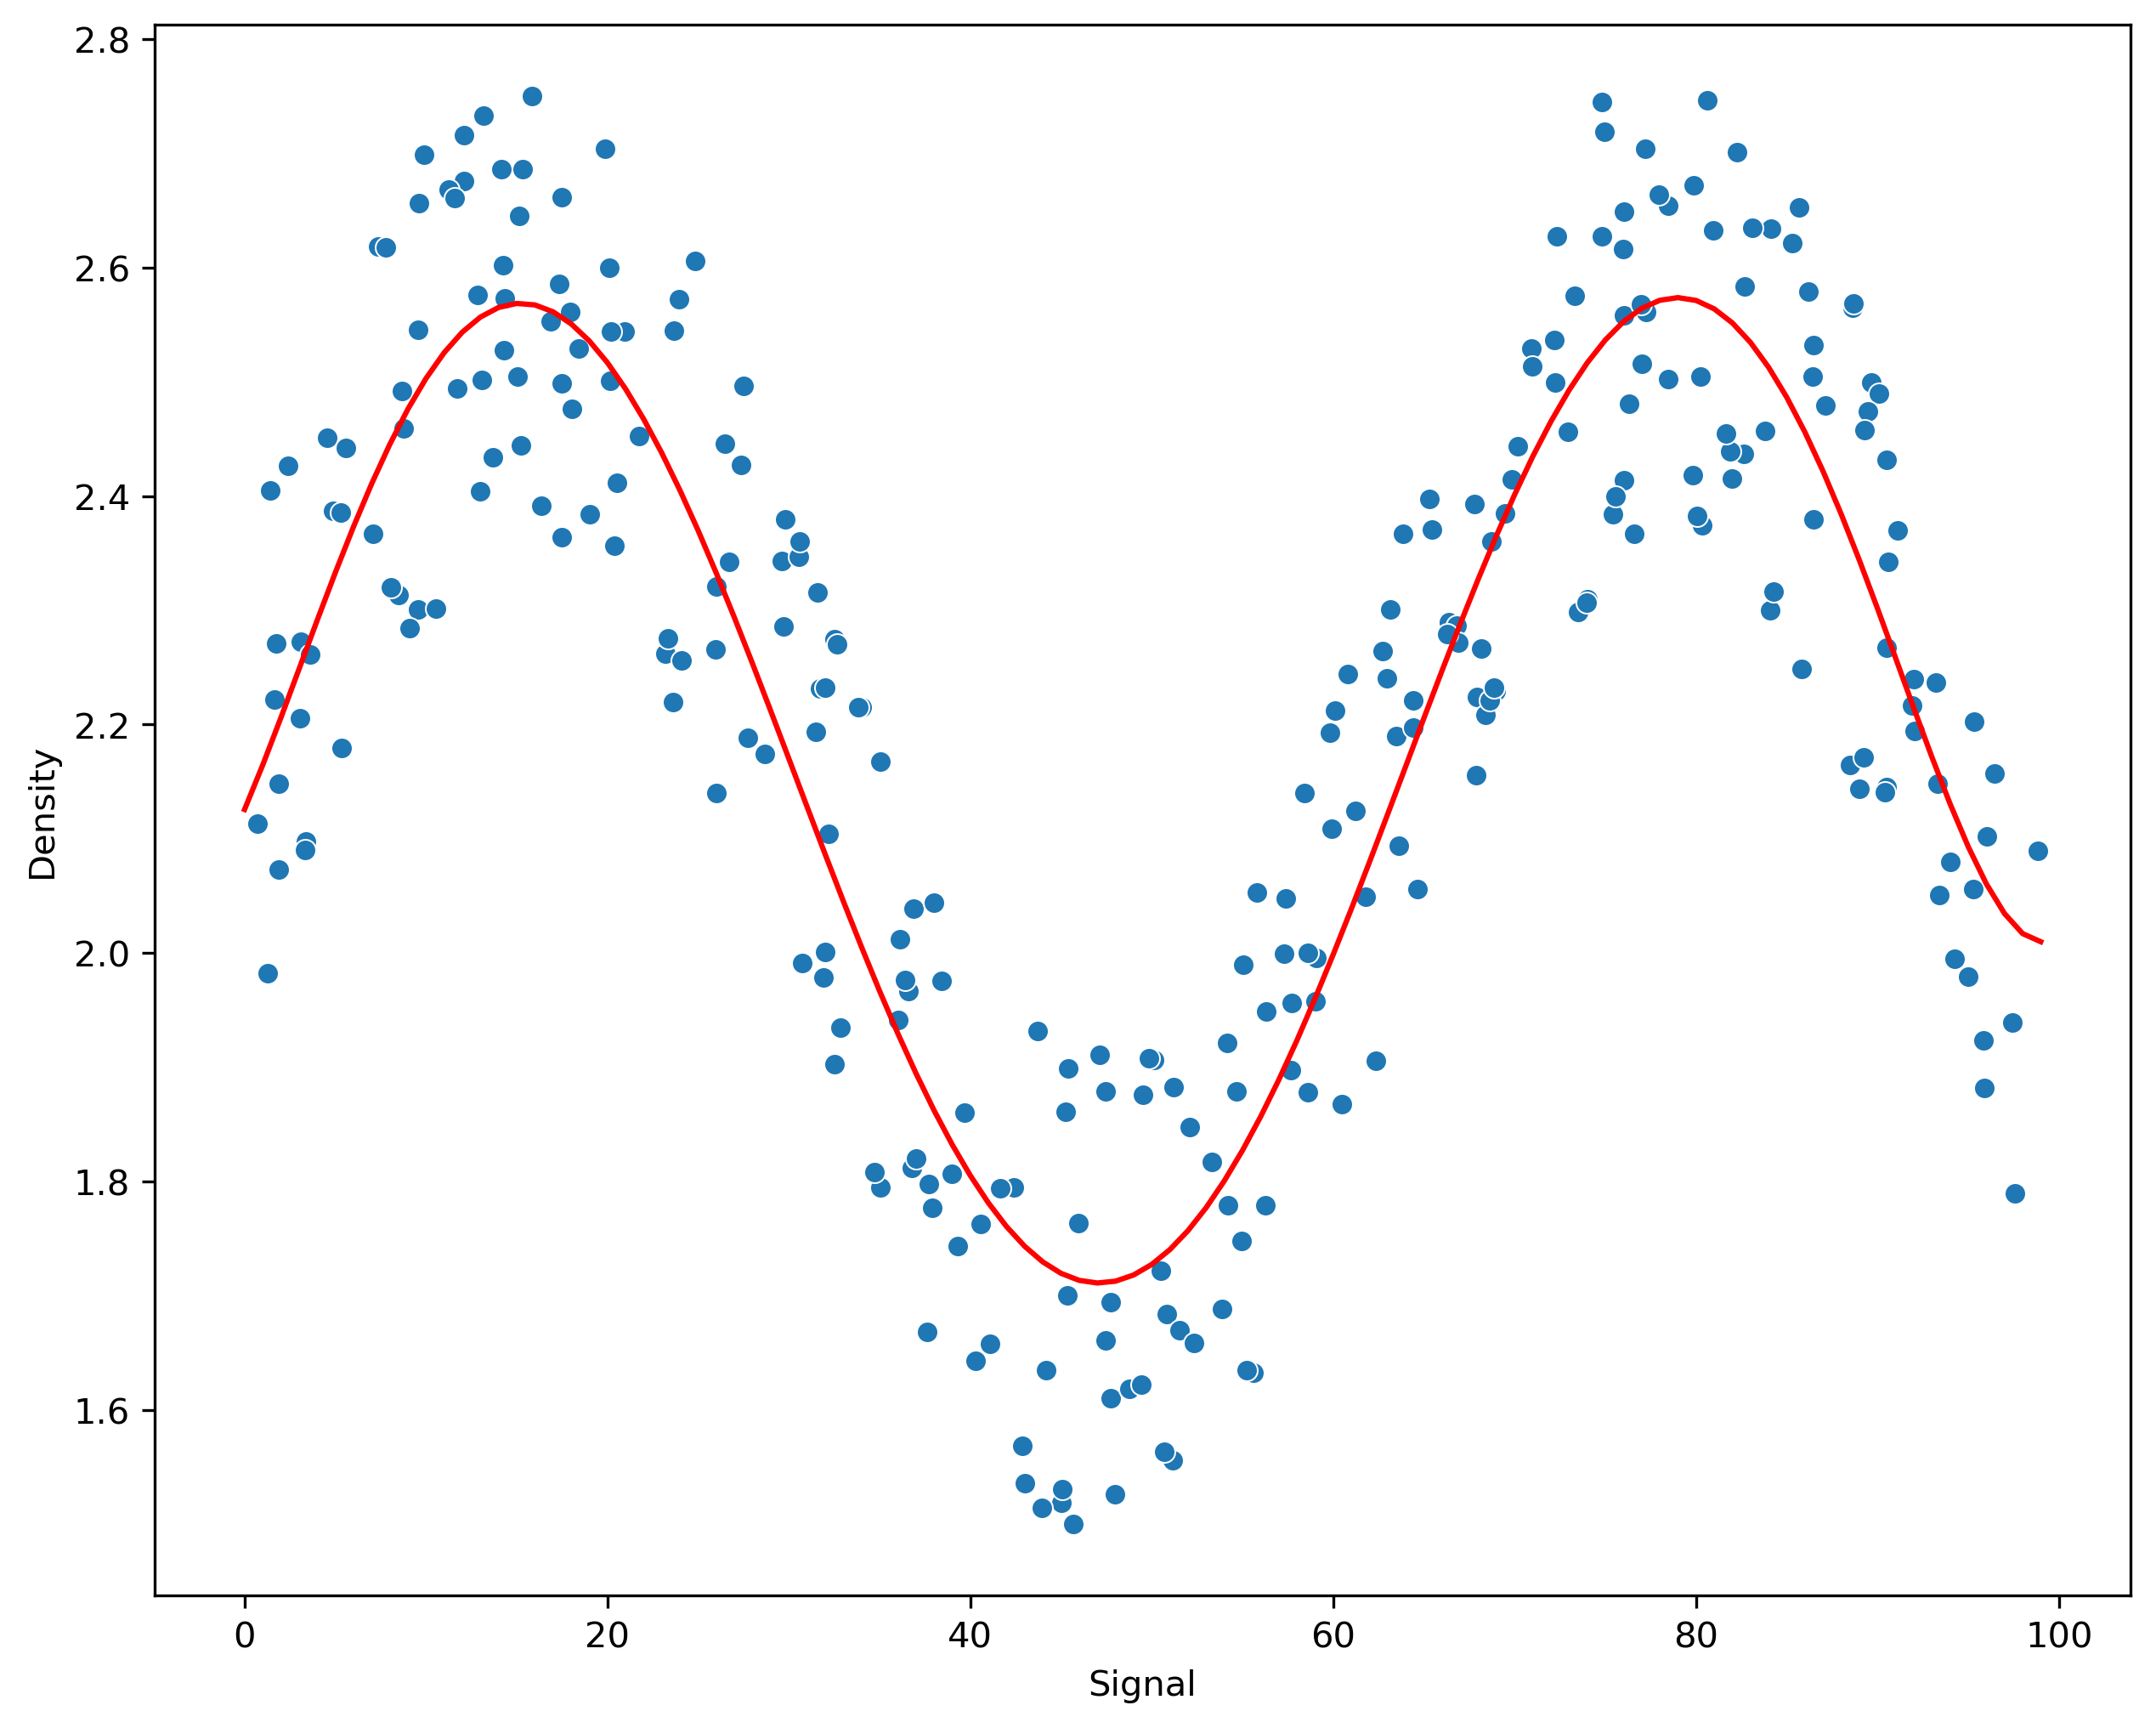

In [23]:
run_model(pipe,X_train,y_train,X_test,y_test)

Random Forest Regression :

In [27]:
from sklearn.neighbors import KNeighborsRegressor

MAE : 0.11877297474442378 
RMSE: 0.1523487028635337
MAE : 0.12198383614100558 
RMSE: 0.13730685016923647
MAE : 0.11635971693292672 
RMSE: 0.13277855732740926


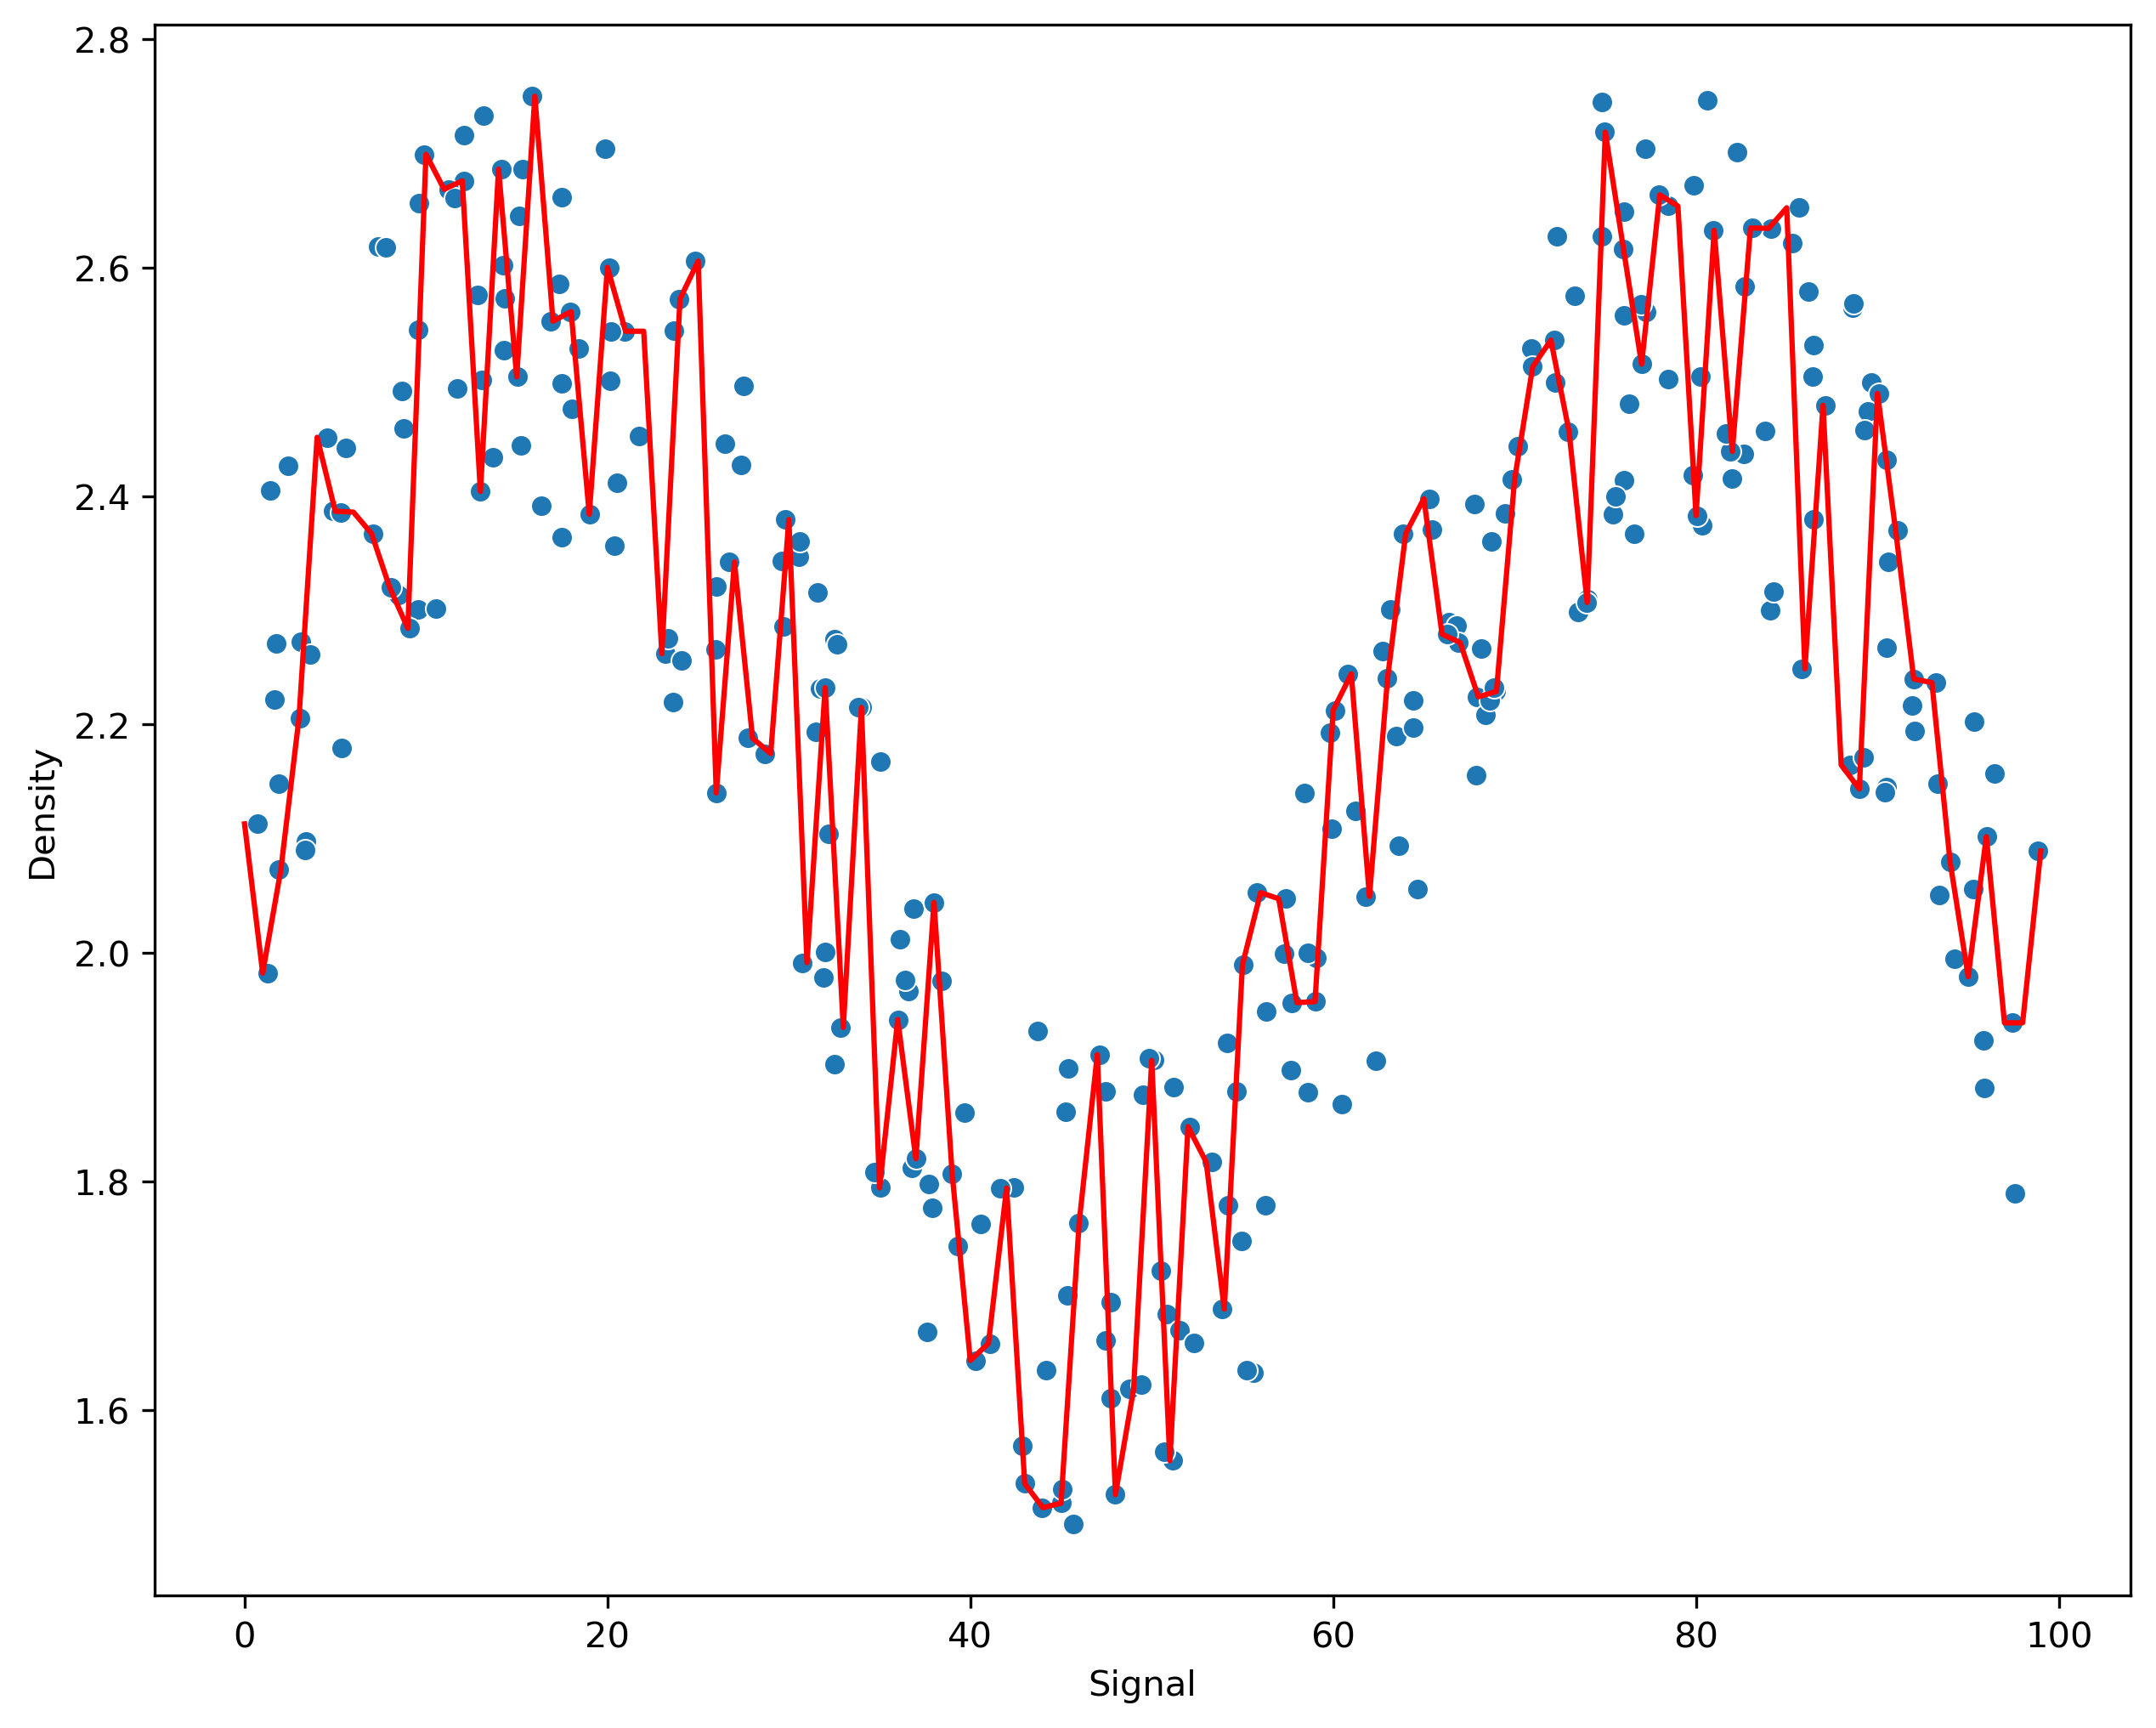

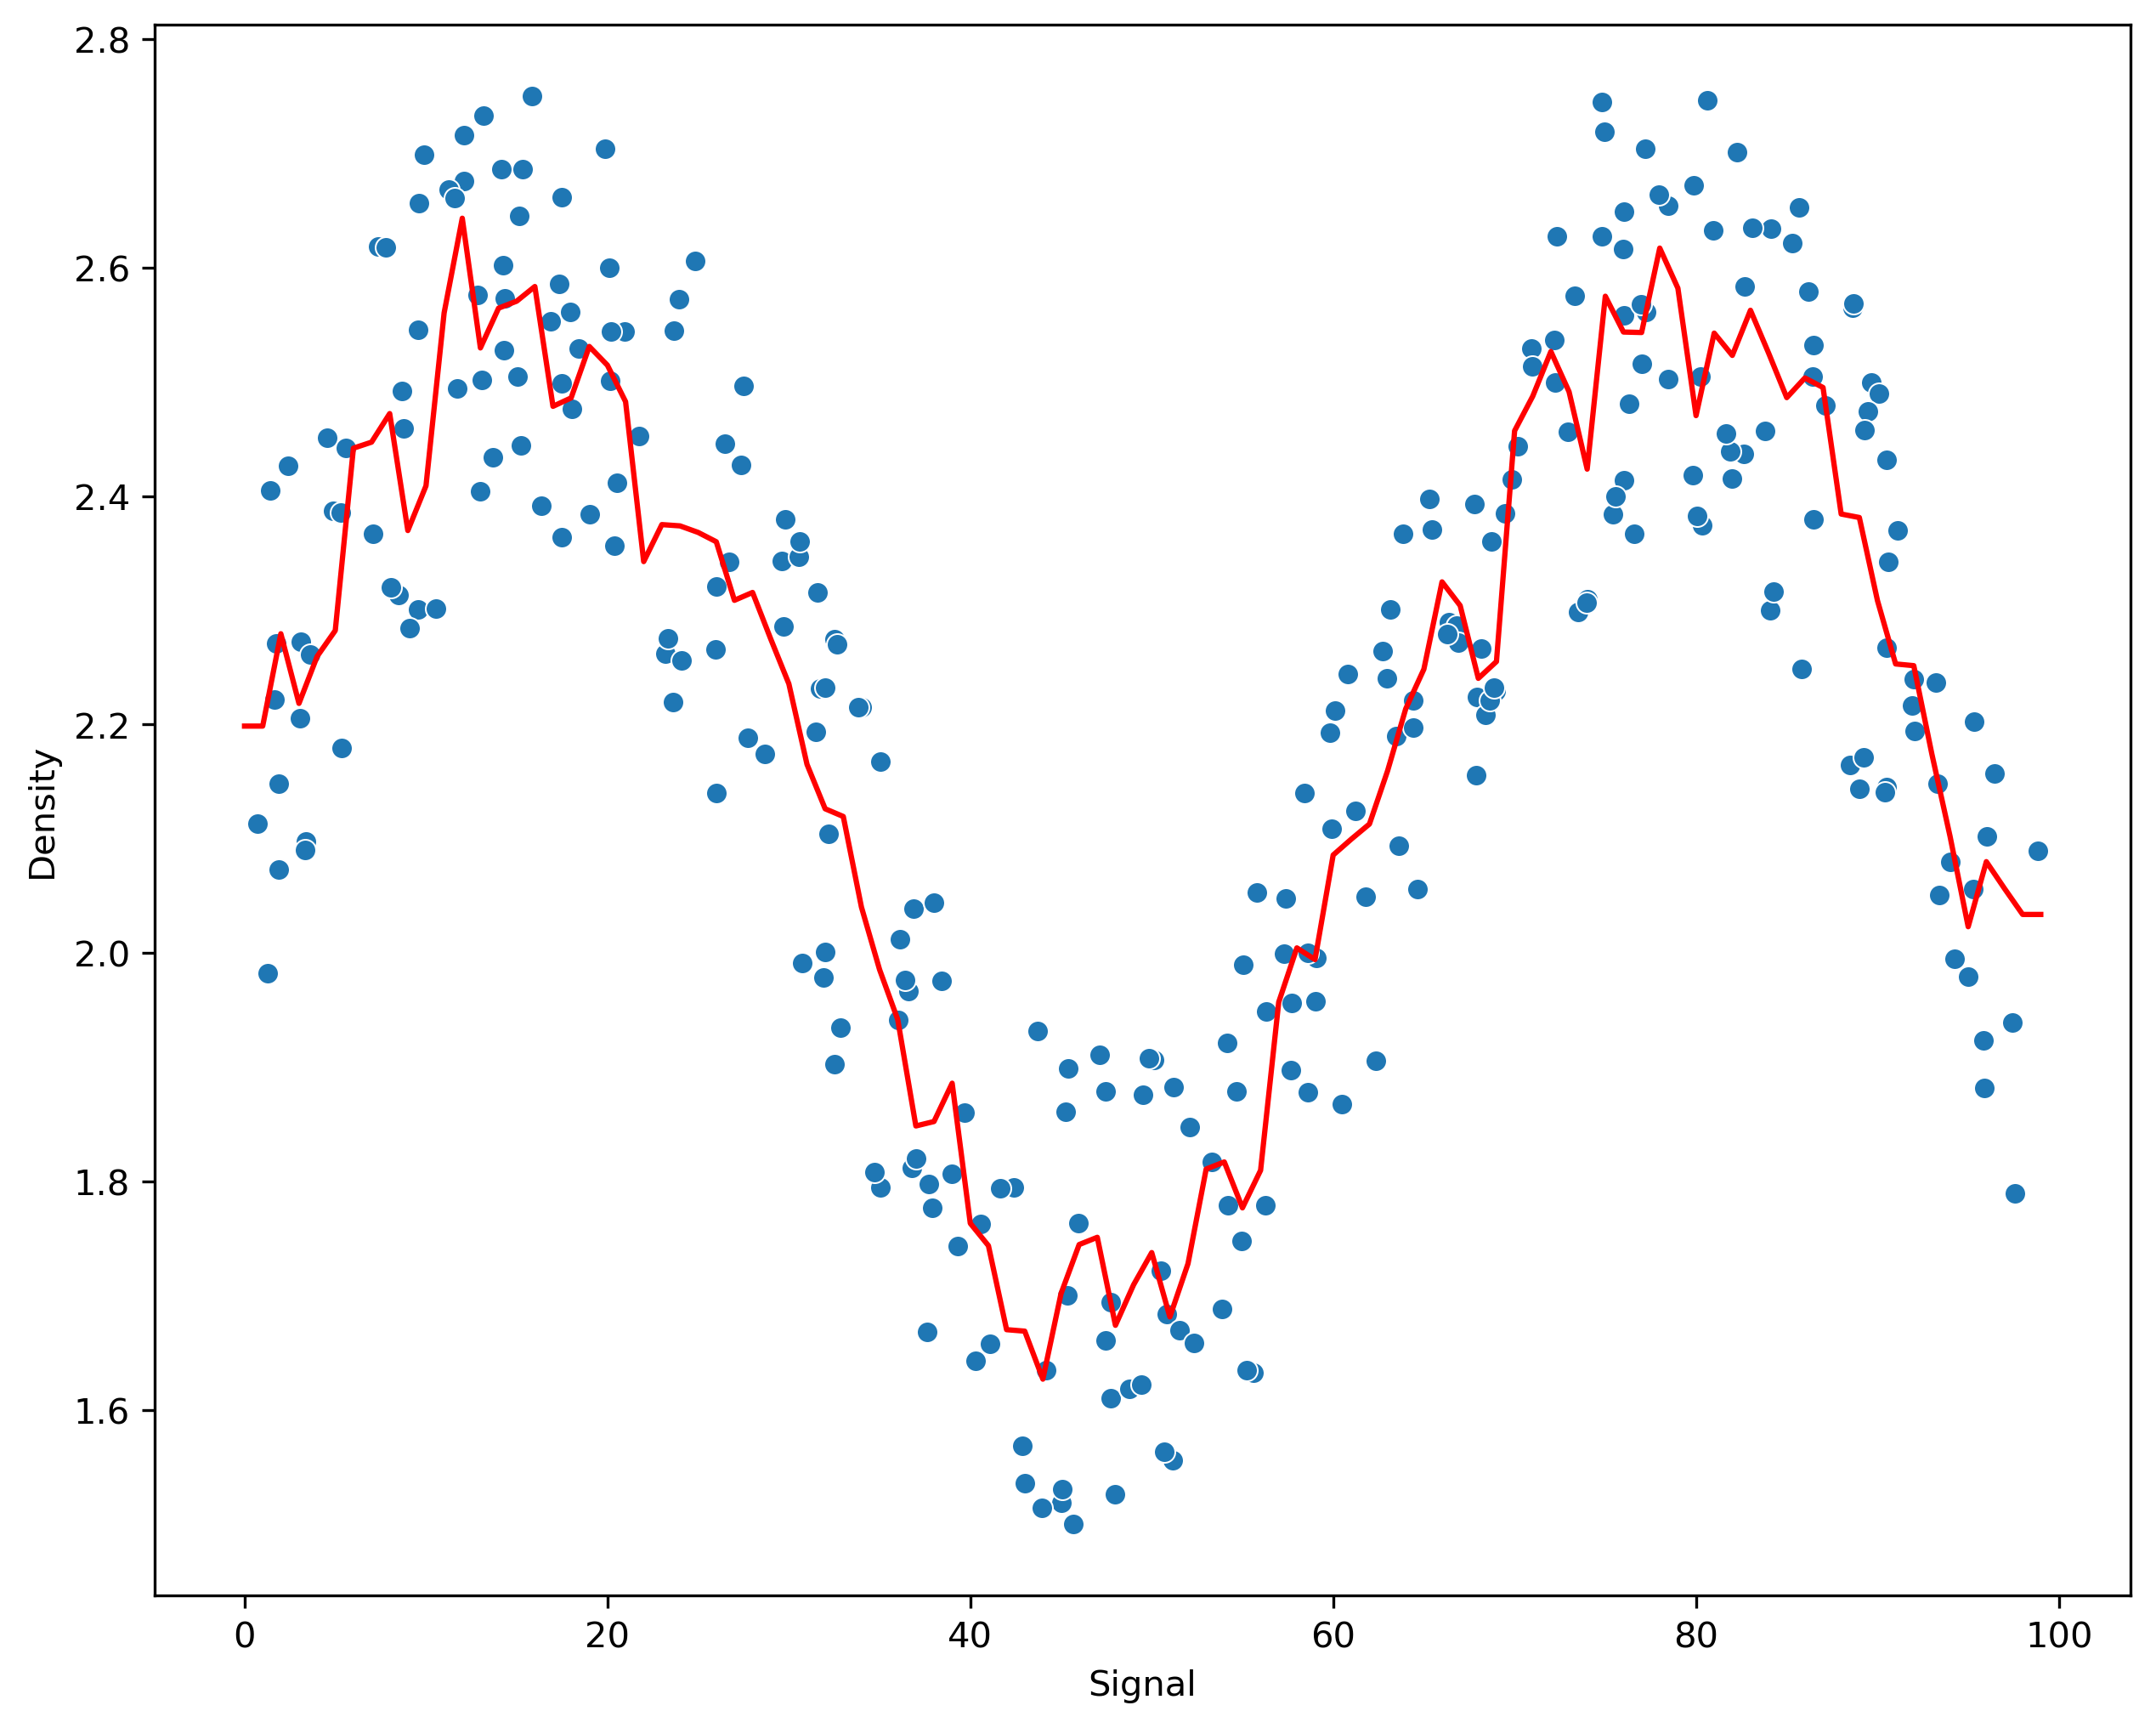

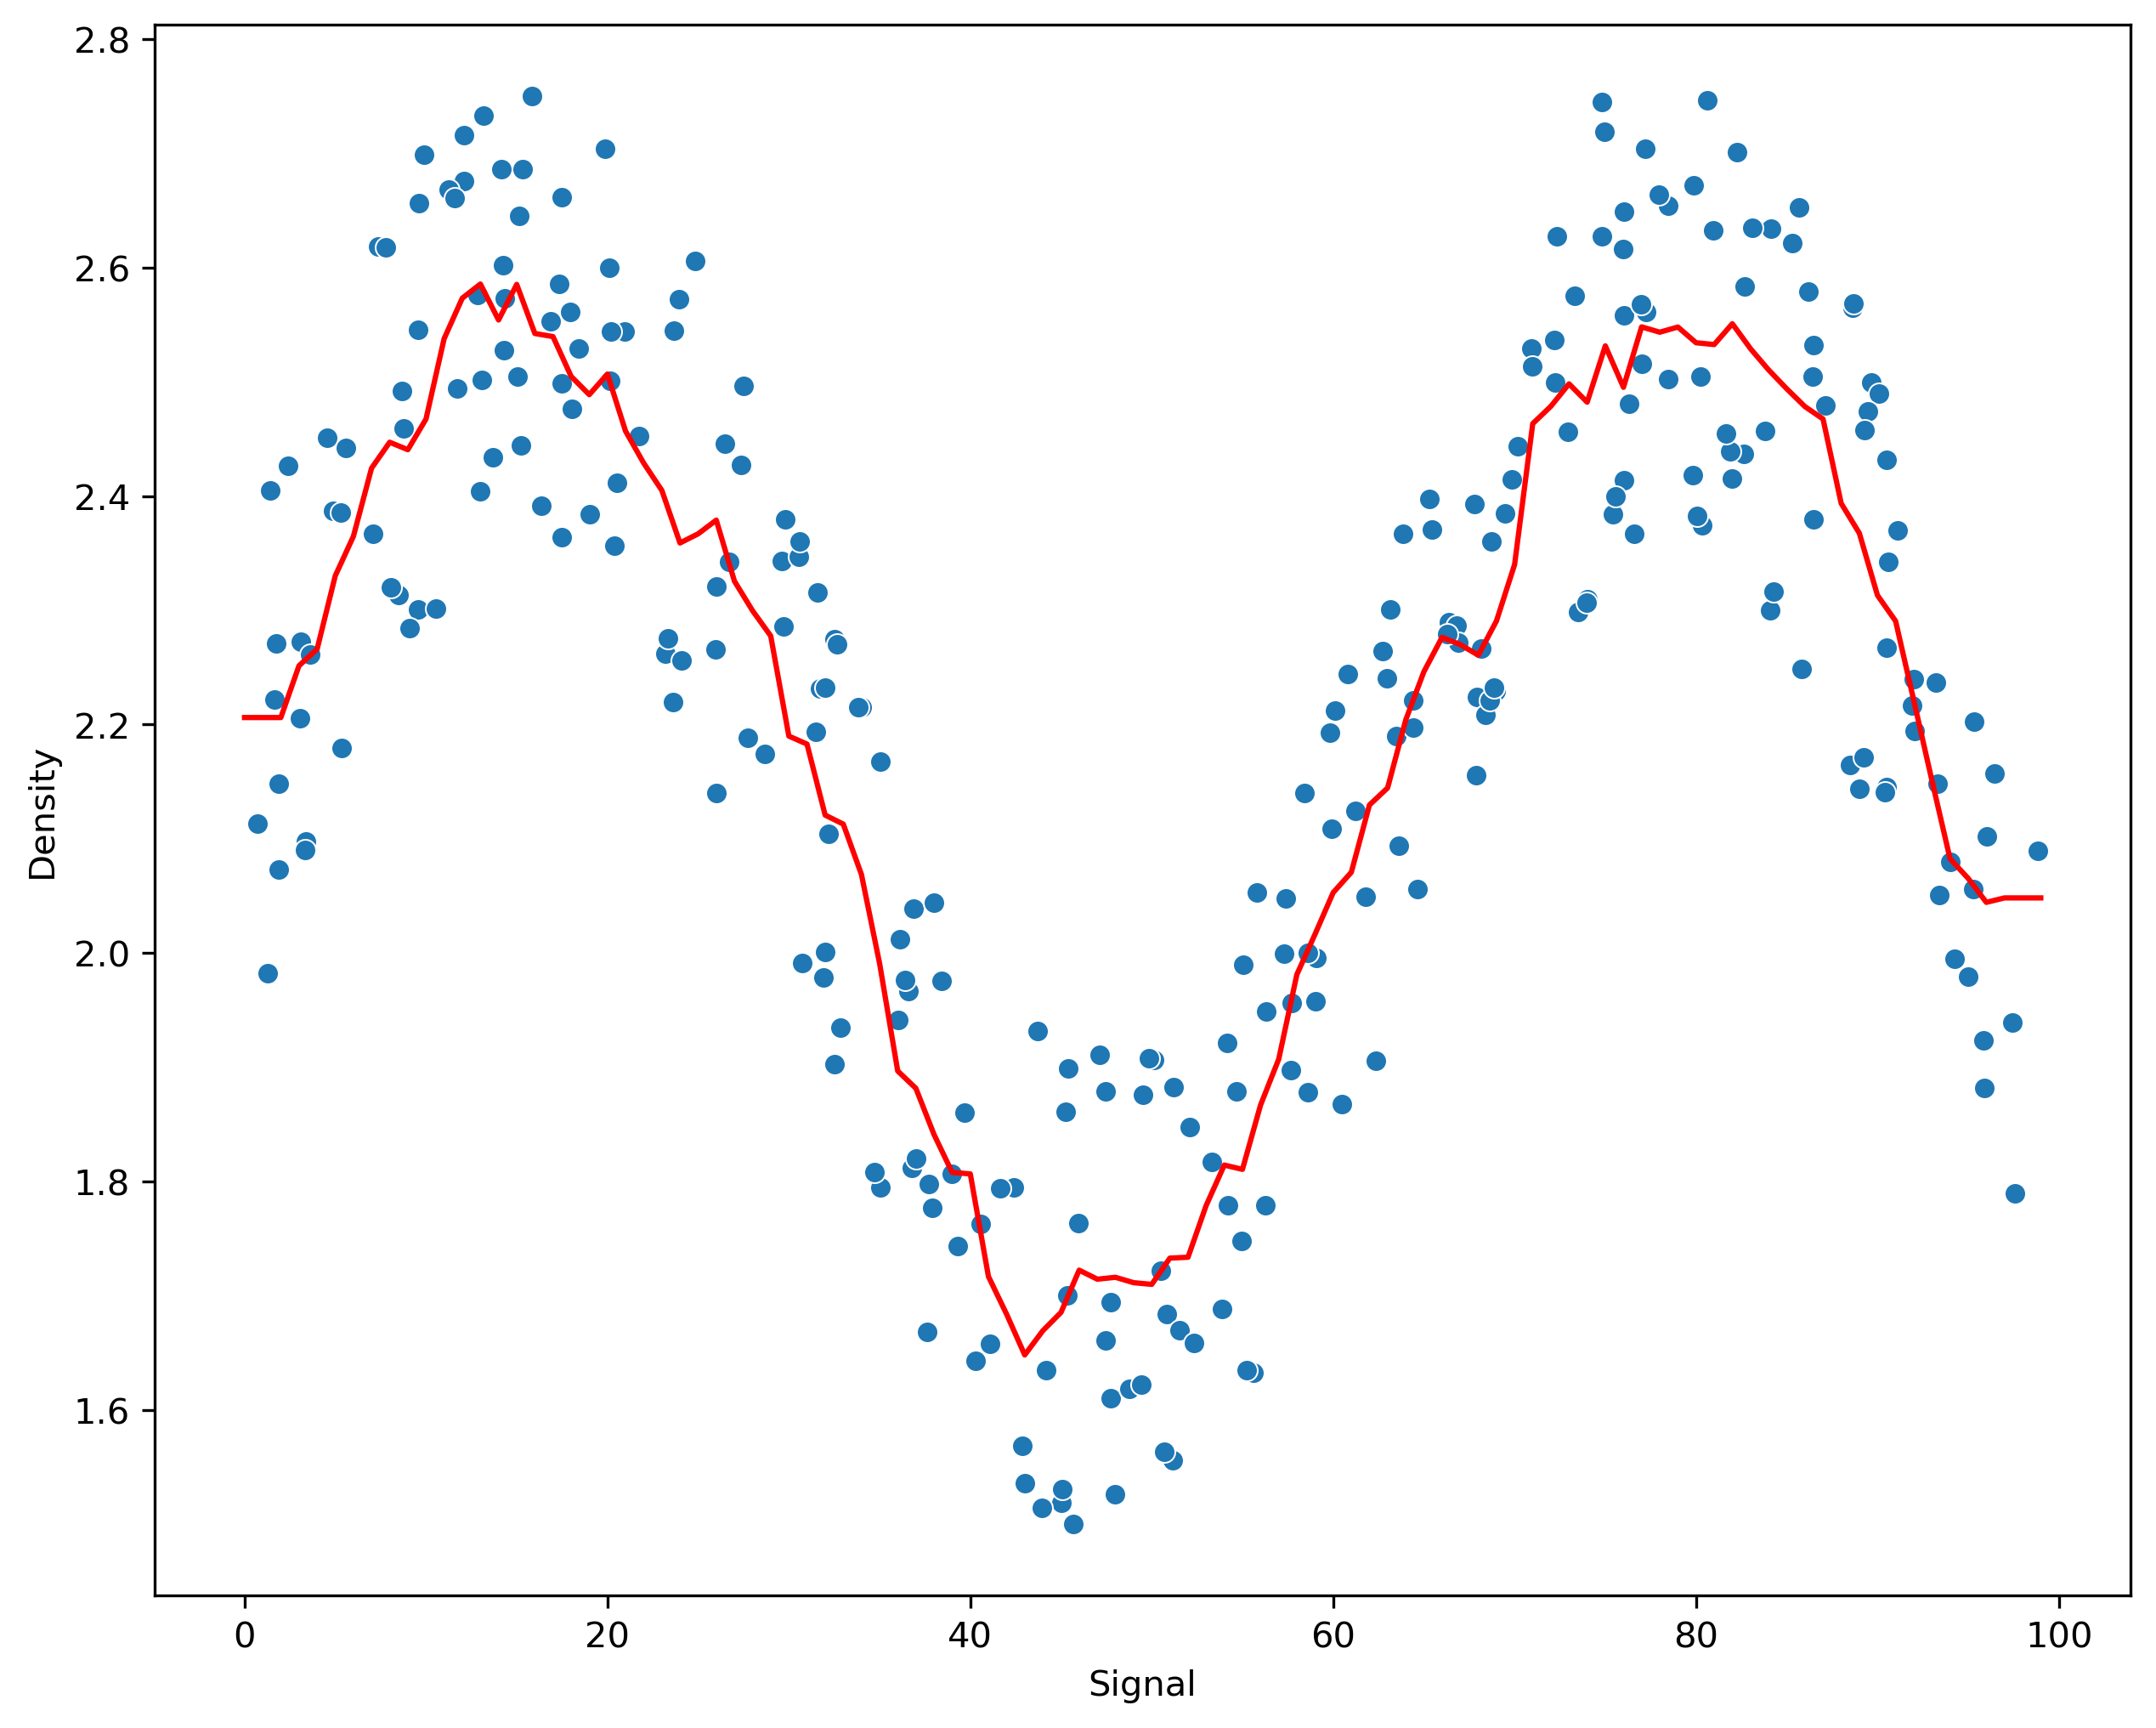

In [29]:
k_values = [1,5,10]


for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

In [30]:
from sklearn.tree import DecisionTreeRegressor

MAE : 0.11877297474442378 
RMSE: 0.1523487028635337


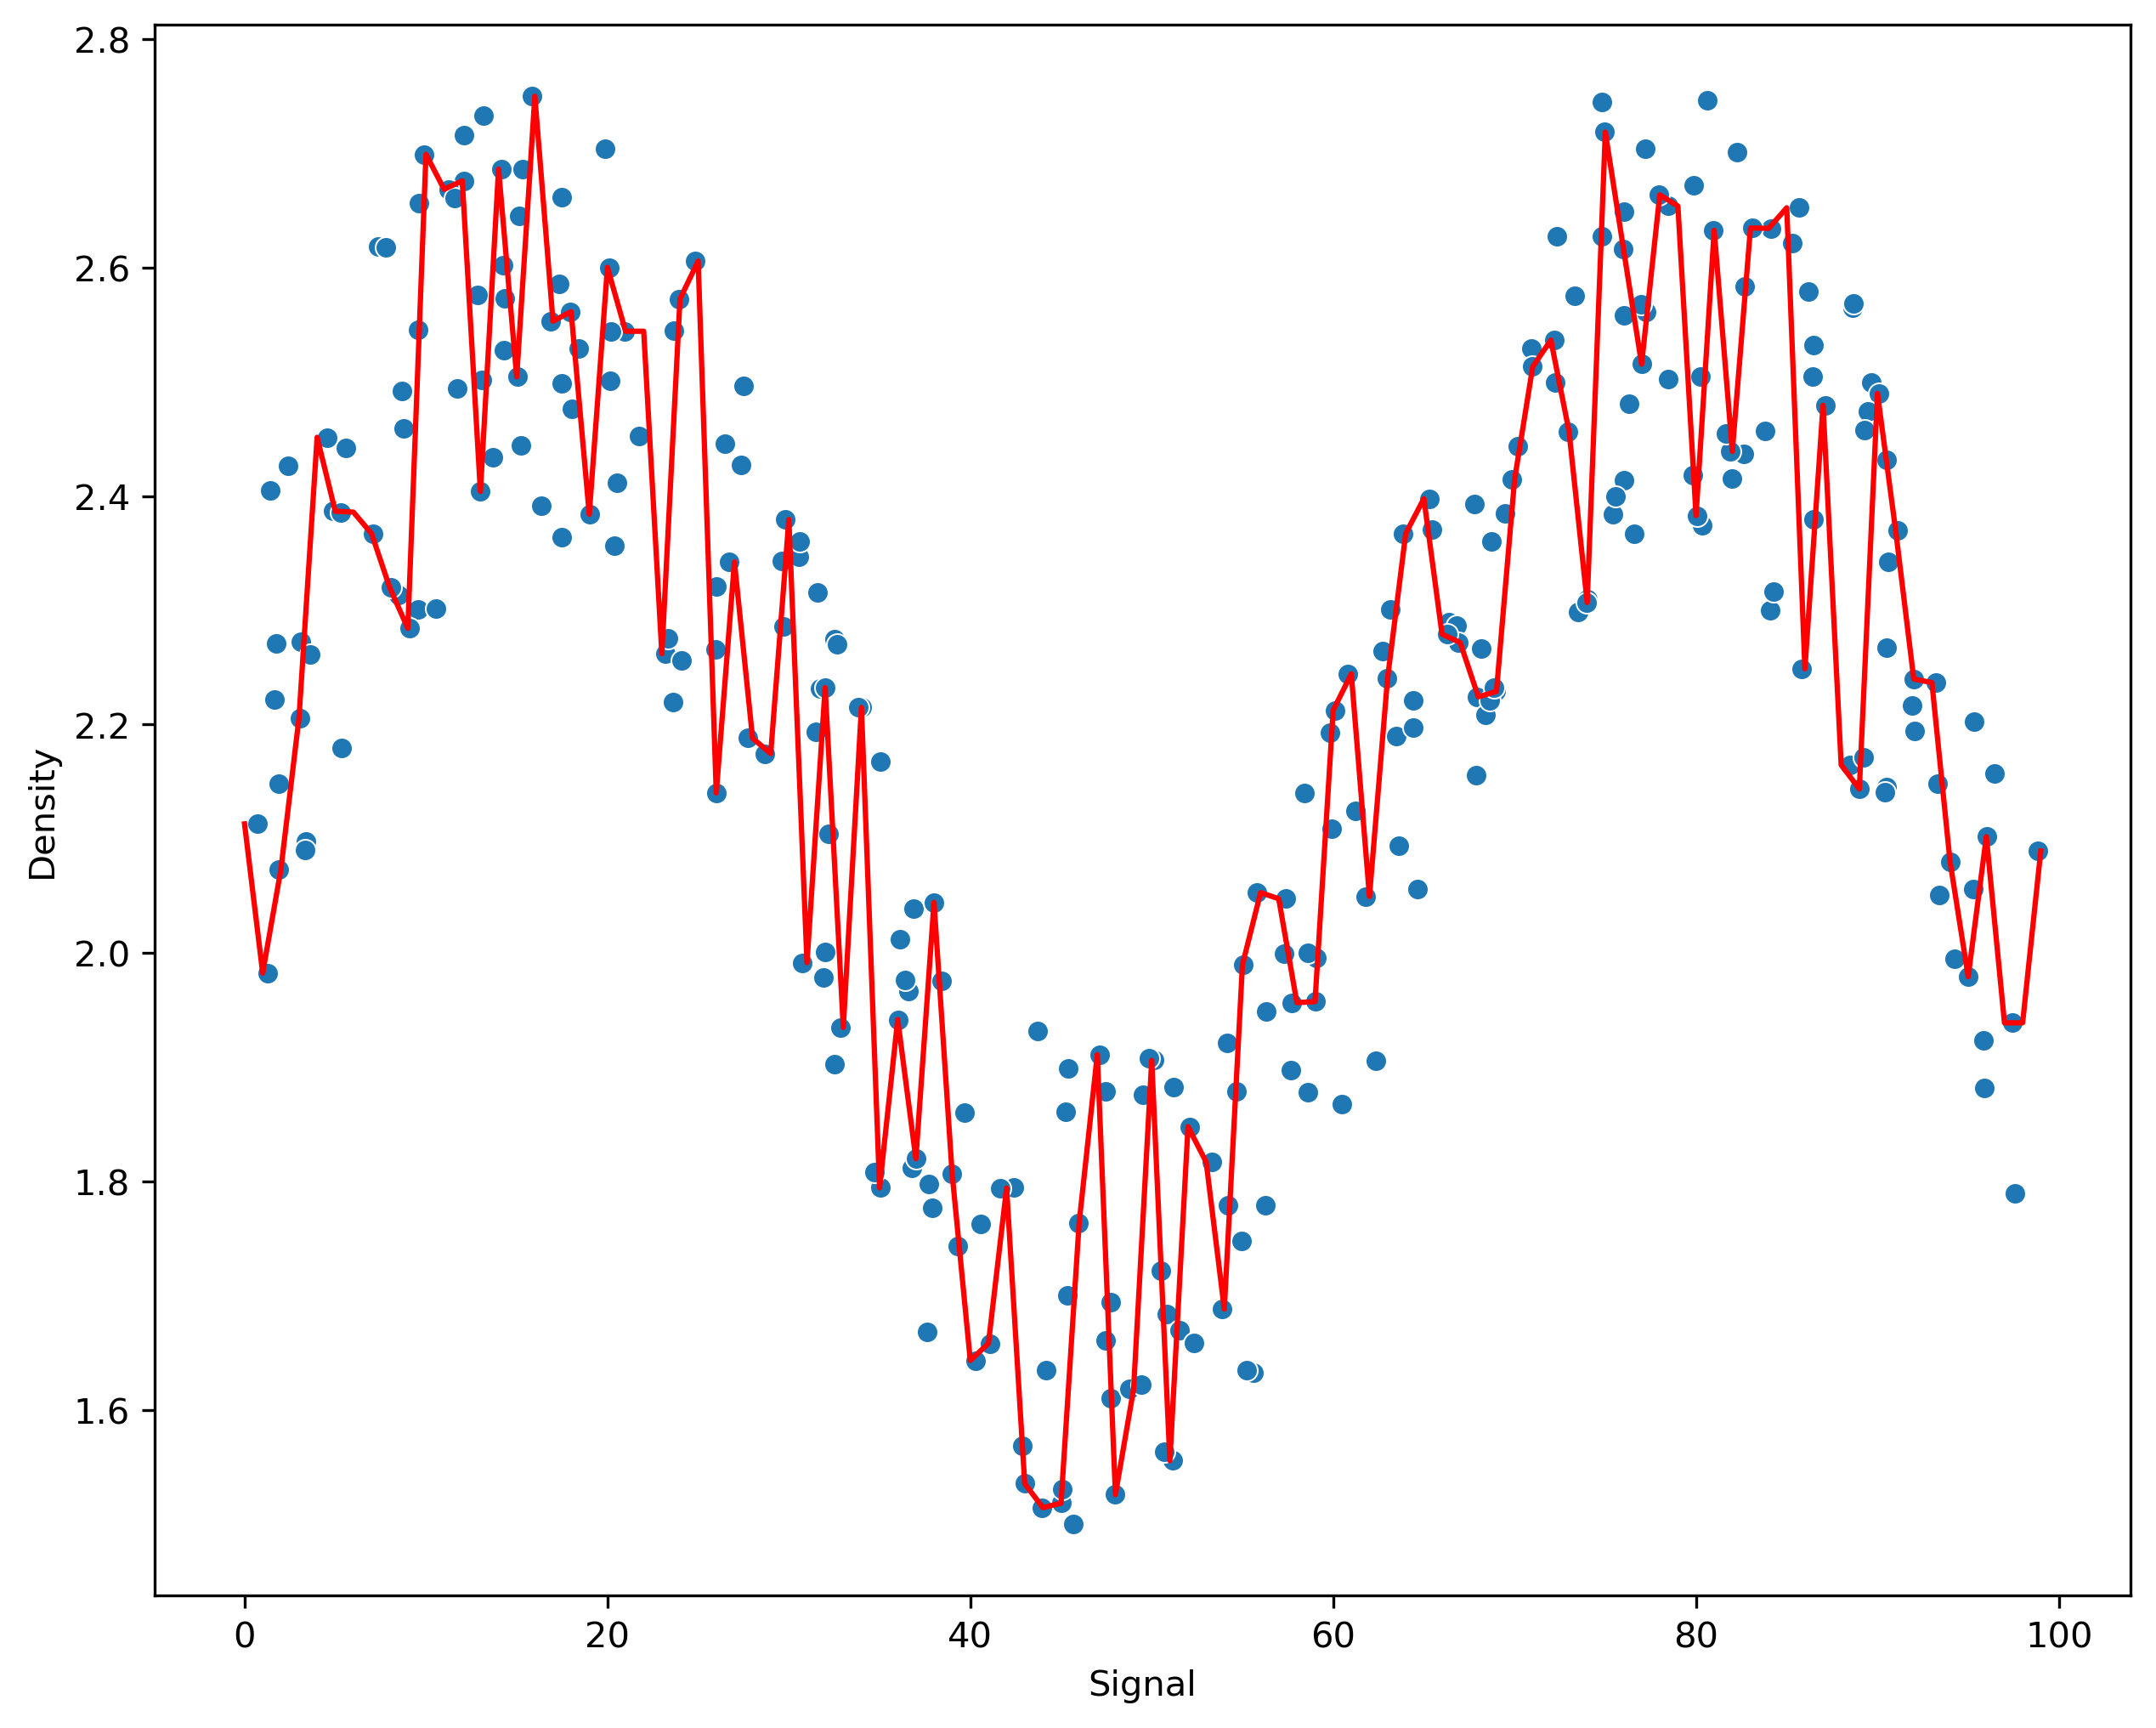

In [32]:
model = DecisionTreeRegressor()
run_model(model,X_train,y_train,X_test,y_test)

In [33]:
from sklearn.svm import SVR

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
svr = SVR()
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],
             'gamma':['auto','scale']}

grid = GridSearchCV(svr,param_grid)

MAE : 0.10854210121348368 
RMSE: 0.12646999302046696


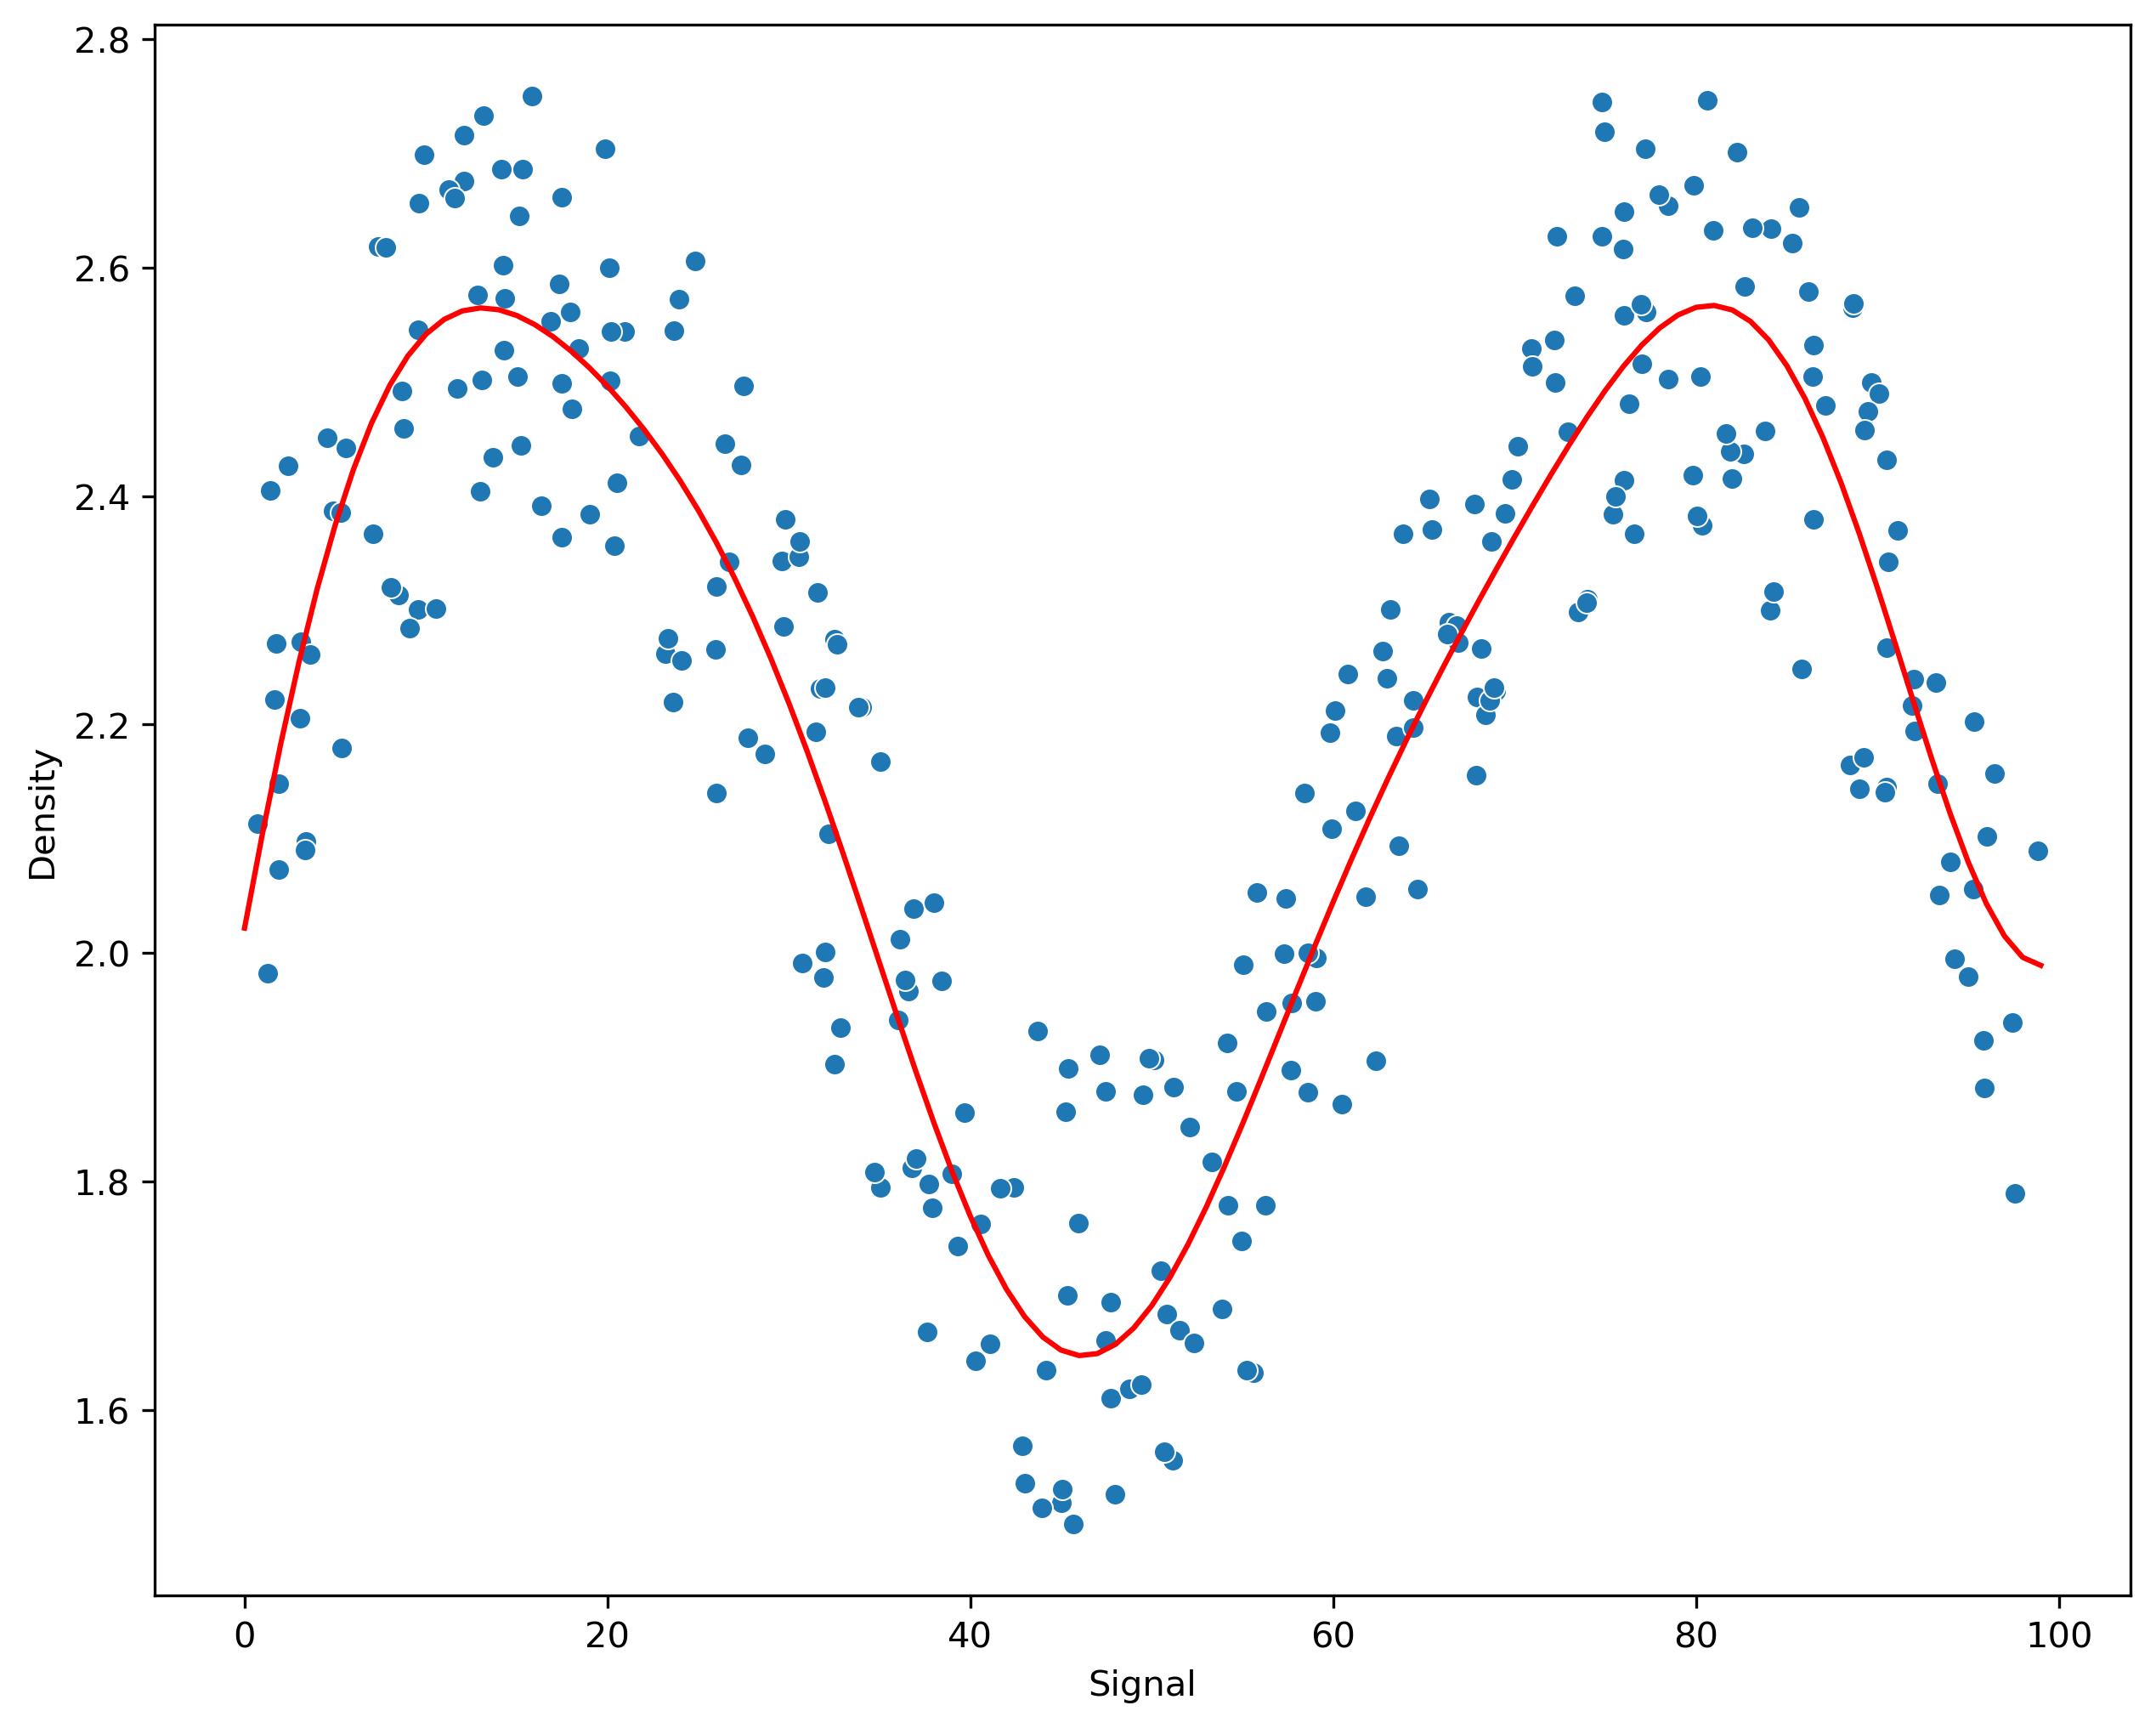

In [36]:
model = DecisionTreeRegressor()
run_model(grid,X_train,y_train,X_test,y_test)

In [37]:
from sklearn.ensemble import RandomForestRegressor


In [38]:
rfr = RandomForestRegressor(n_estimators=10)

MAE : 0.11255527447791322 
RMSE: 0.13264404184862755


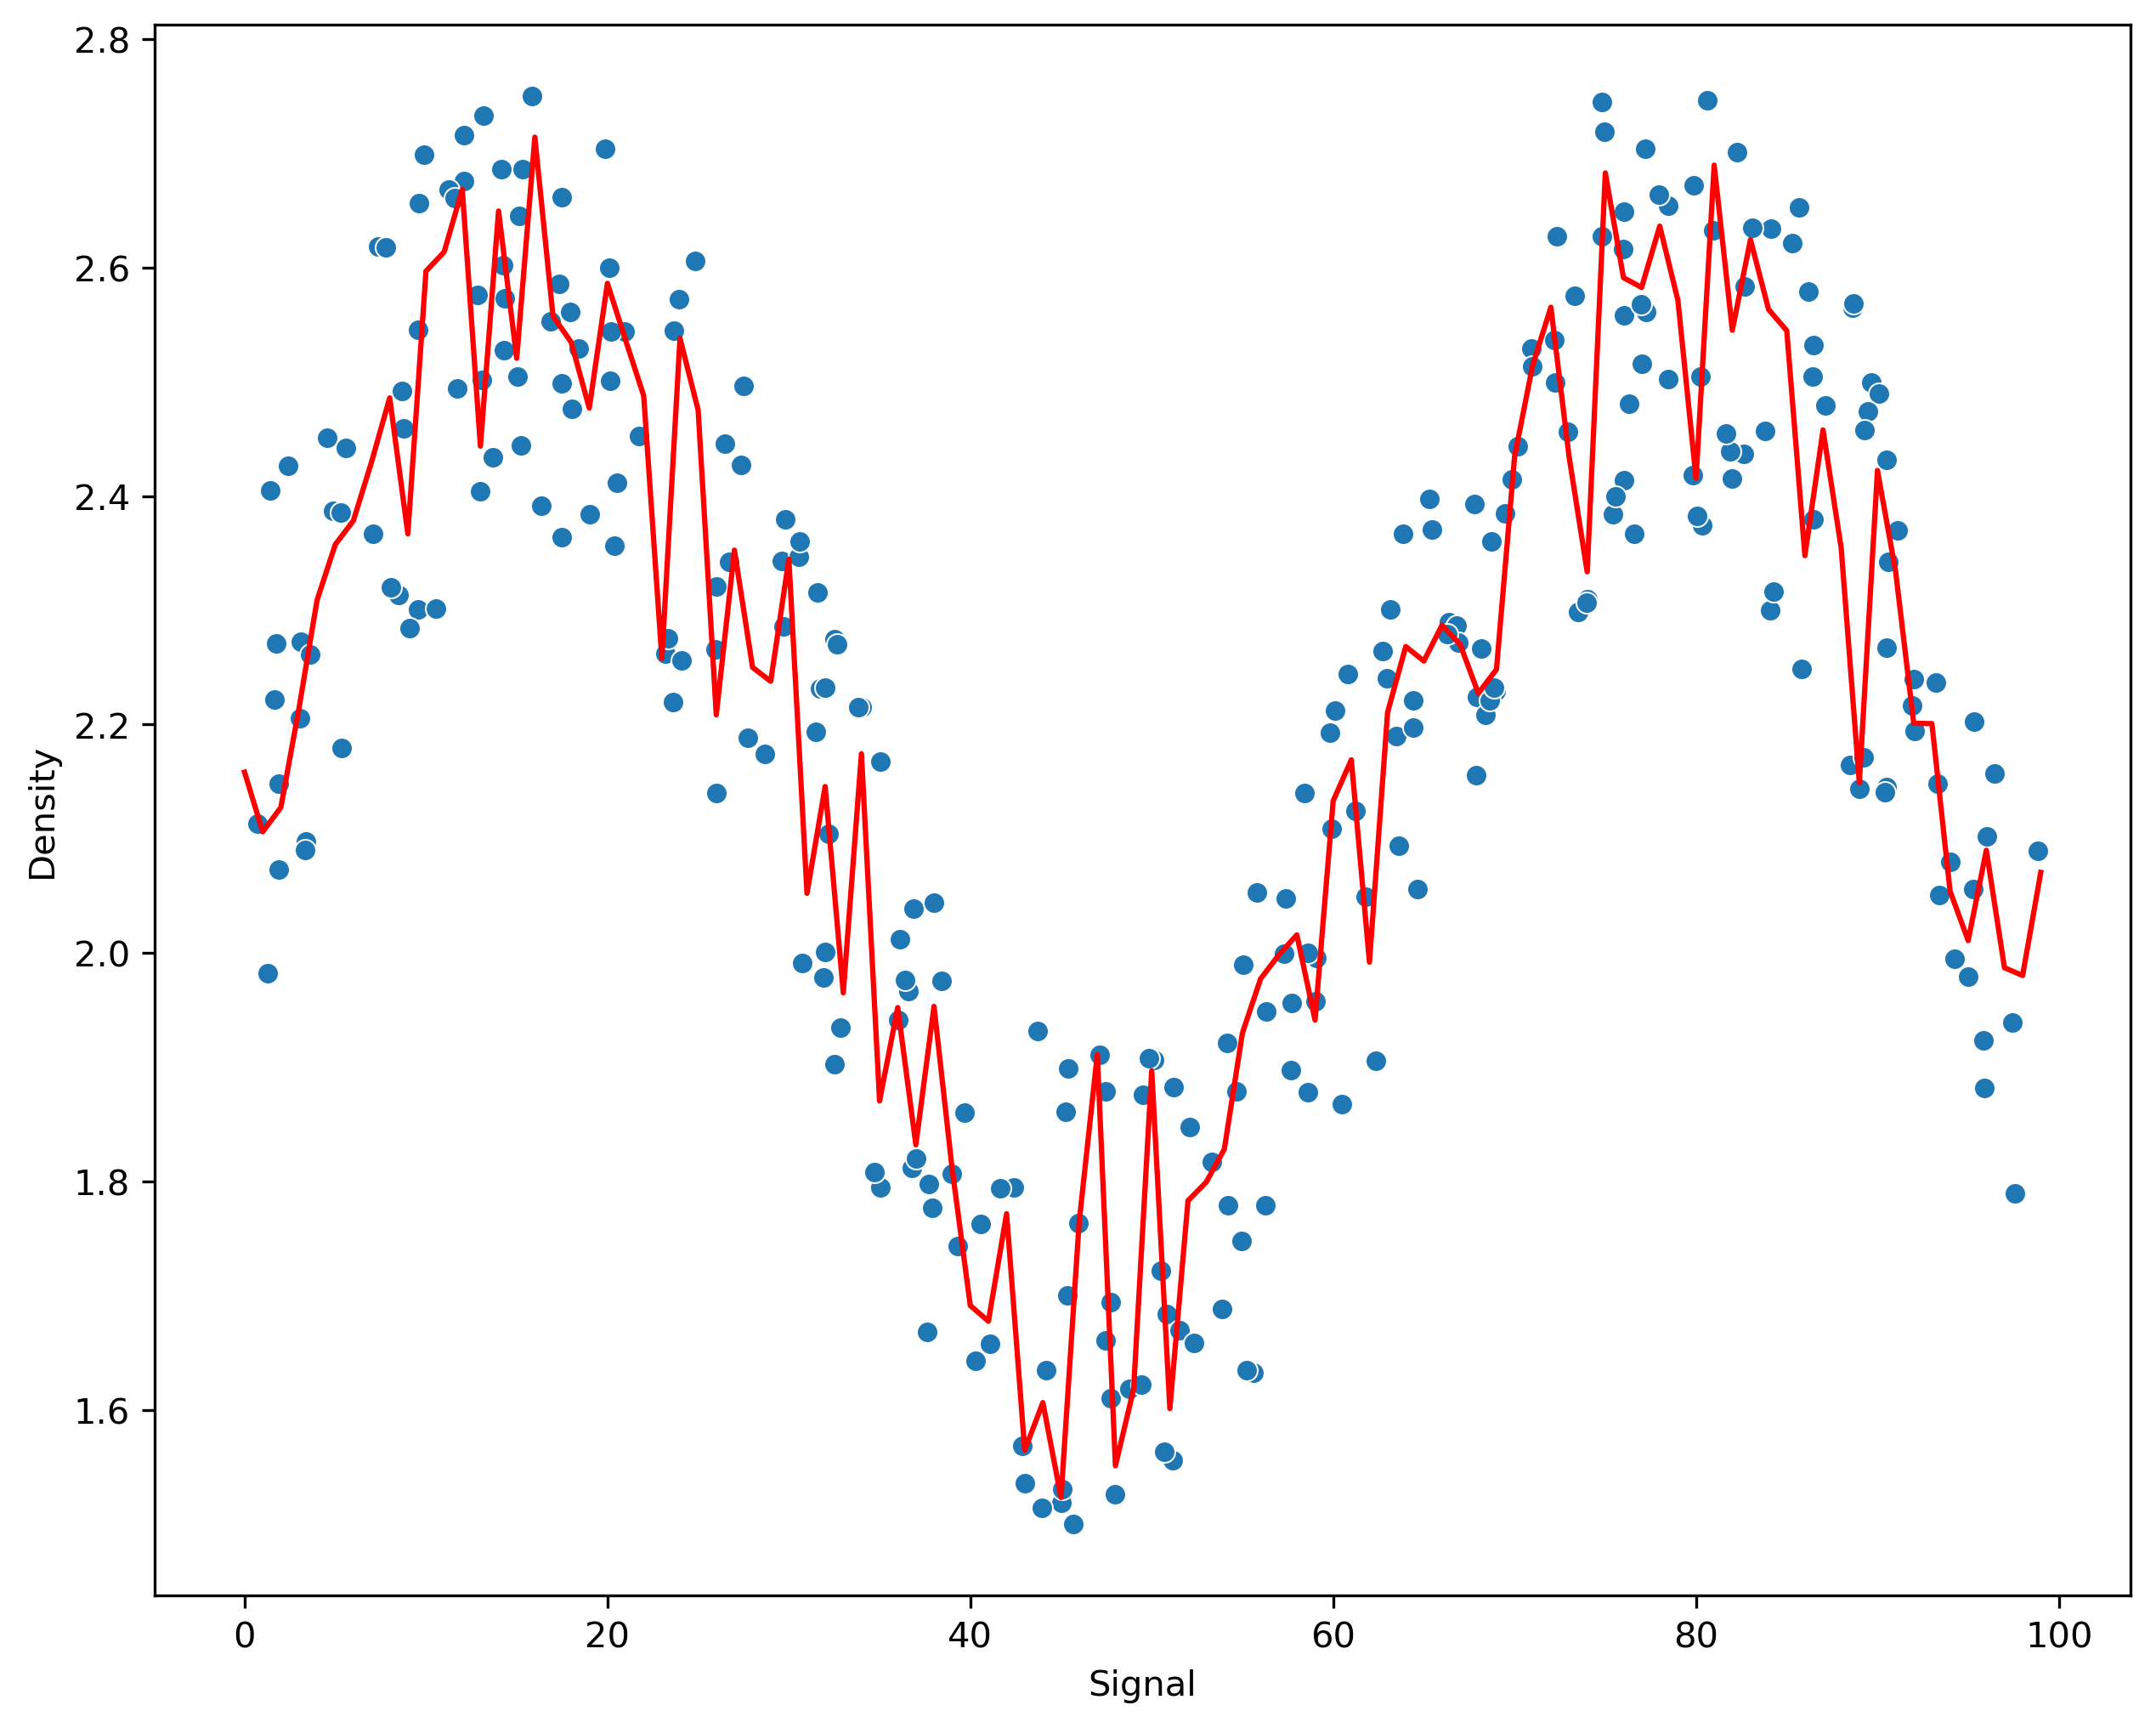

In [39]:
run_model(rfr,X_train,y_train,X_test,y_test)